
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [2]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
 
model.add(Dense( 512,input_shape=(784,))) # 輸入層，28*28=784   
model.add(Activation('relu')) # 激活函數是relu   

model.add(Dense( 512)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 512)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 512)) # 隱藏層節點500個   
model.add(Activation('relu'))  

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

In [3]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1195018


In [4]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
__________

In [5]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''
opt = optimizers.Adam()



In [6]:
# 第三步：編譯, 
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])/255.0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])/255.0
Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)


In [8]:

'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
batch_size = 64
epochs = 20


In [9]:
# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=2,validation_split=0.3 )

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 4s - loss: 0.2411 - acc: 0.9287 - val_loss: 0.1555 - val_acc: 0.9548
Epoch 2/20
 - 4s - loss: 0.1024 - acc: 0.9701 - val_loss: 0.1731 - val_acc: 0.9527
Epoch 3/20
 - 4s - loss: 0.0763 - acc: 0.9773 - val_loss: 0.1162 - val_acc: 0.9668
Epoch 4/20
 - 4s - loss: 0.0582 - acc: 0.9819 - val_loss: 0.1186 - val_acc: 0.9669
Epoch 5/20
 - 4s - loss: 0.0468 - acc: 0.9854 - val_loss: 0.1191 - val_acc: 0.9703
Epoch 6/20
 - 4s - loss: 0.0408 - acc: 0.9880 - val_loss: 0.1156 - val_acc: 0.9712
Epoch 7/20
 - 4s - loss: 0.0355 - acc: 0.9894 - val_loss: 0.1210 - val_acc: 0.9725
Epoch 8/20
 - 4s - loss: 0.0277 - acc: 0.9913 - val_loss: 0.1122 - val_acc: 0.9751
Epoch 9/20
 - 4s - loss: 0.0282 - acc: 0.9915 - val_loss: 0.1631 - val_acc: 0.9701
Epoch 10/20
 - 4s - loss: 0.0290 - acc: 0.9915 - val_loss: 0.1059 - val_acc: 0.9740
Epoch 11/20
 - 4s - loss: 0.0223 - acc: 0.9932 - val_loss: 0.1247 - val_acc: 0.9763
Epoch 12/20
 - 4s - loss: 0.0181 - 

In [10]:
#    第六步：輸出
 
print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
#print ( " The test loss is %f " % scores)
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)

result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )

result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

 test set 

 The test loss is %f  [0.1340343151787522, 0.9780000078678132]

 The accuracy of the model is 0.978000 


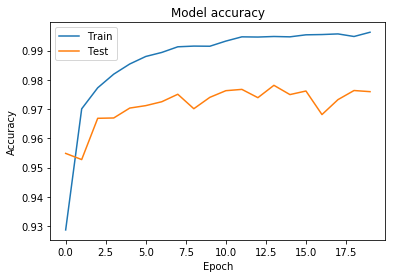

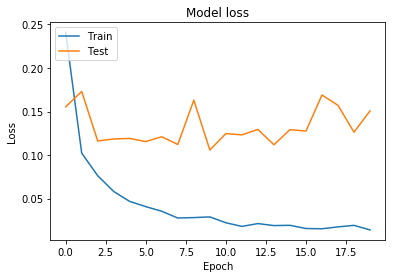

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# different batch size

### Batch 32, Epoch 20

In [12]:
model = Sequential()
model.add(Dense( 512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense( 512))
model.add(Activation('relu'))  
model.add(Dense( 512))
model.add(Activation('relu'))  
model.add(Dense( 512)) 
model.add(Activation('relu'))  
model.add(Dense( 10))
model.add(Activation('softmax'))
opt = optimizers.Adam()
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
batch_size = 32
epochs = 20
history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=1,validation_split=0.3 )

print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)
result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )
result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 8s 186us/step - loss: 0.2430 - acc: 0.9271 - val_loss: 0.1474 - val_acc: 0.9581
Epoch 2/20
42000/42000 [==============================] - 7s 177us/step - loss: 0.1134 - acc: 0.9673 - val_loss: 0.1454 - val_acc: 0.9607
Epoch 3/20
42000/42000 [==============================] - 7s 177us/step - loss: 0.0823 - acc: 0.9759 - val_loss: 0.1269 - val_acc: 0.9643
Epoch 4/20
42000/42000 [==============================] - 8s 185us/step - loss: 0.0658 - acc: 0.9806 - val_loss: 0.1299 - val_acc: 0.9712
Epoch 5/20
42000/42000 [==============================] - 8s 192us/step - loss: 0.0548 - acc: 0.9843 - val_loss: 0.1393 - val_acc: 0.9644
Epoch 6/20
42000/42000 [==============================] - 8s 188us/step - loss: 0.0474 - acc: 0.9860 - val_loss: 0.1087 - val_acc: 0.9738
Epoch 7/20
42000/42000 [==============================] - 8s 185us/step - loss: 0.0425 - acc: 0.9880 - val_loss: 0.1500 - 

### Batch 128, Epoch 20

In [13]:
model = Sequential()
model.add(Dense( 512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense( 512))
model.add(Activation('relu'))  
model.add(Dense( 512))
model.add(Activation('relu'))  
model.add(Dense( 512)) 
model.add(Activation('relu'))  
model.add(Dense( 10))
model.add(Activation('softmax'))
opt = optimizers.Adam()
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
batch_size = 128
epochs = 20
history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=1,validation_split=0.3 )

print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)
result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )
result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 3s 62us/step - loss: 0.2562 - acc: 0.9229 - val_loss: 0.1509 - val_acc: 0.9541
Epoch 2/20
42000/42000 [==============================] - 2s 52us/step - loss: 0.0971 - acc: 0.9704 - val_loss: 0.1320 - val_acc: 0.9633
Epoch 3/20
42000/42000 [==============================] - 2s 51us/step - loss: 0.0642 - acc: 0.9800 - val_loss: 0.1113 - val_acc: 0.9685
Epoch 4/20
42000/42000 [==============================] - 2s 52us/step - loss: 0.0512 - acc: 0.9842 - val_loss: 0.1030 - val_acc: 0.9723
Epoch 5/20
42000/42000 [==============================] - 2s 52us/step - loss: 0.0367 - acc: 0.9889 - val_loss: 0.1230 - val_acc: 0.9683
Epoch 6/20
42000/42000 [==============================] - 2s 52us/step - loss: 0.0382 - acc: 0.9875 - val_loss: 0.1192 - val_acc: 0.9727
Epoch 7/20
42000/42000 [==============================] - 2s 53us/step - loss: 0.0307 - acc: 0.9906 - val_loss: 0.1162 - val_acc

# Different optimizer

### SGD

In [14]:
model = Sequential()
model.add(Dense( 512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense( 512))
model.add(Activation('relu'))  
model.add(Dense( 512))
model.add(Activation('relu'))  
model.add(Dense( 512)) 
model.add(Activation('relu'))  
model.add(Dense( 10))
model.add(Activation('softmax'))
opt = optimizers.SGD()
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
batch_size = 128
epochs = 20
history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=1,validation_split=0.3 )

print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)
result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )
result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 2s 50us/step - loss: 1.5240 - acc: 0.6636 - val_loss: 0.6888 - val_acc: 0.8307
Epoch 2/20
42000/42000 [==============================] - 2s 38us/step - loss: 0.5035 - acc: 0.8676 - val_loss: 0.4016 - val_acc: 0.8868
Epoch 3/20
42000/42000 [==============================] - 2s 38us/step - loss: 0.3642 - acc: 0.8983 - val_loss: 0.3381 - val_acc: 0.8994
Epoch 4/20
42000/42000 [==============================] - 2s 38us/step - loss: 0.3119 - acc: 0.9118 - val_loss: 0.2983 - val_acc: 0.9139
Epoch 5/20
42000/42000 [==============================] - 2s 37us/step - loss: 0.2803 - acc: 0.9200 - val_loss: 0.2826 - val_acc: 0.9182
Epoch 6/20
42000/42000 [==============================] - 2s 37us/step - loss: 0.2564 - acc: 0.9261 - val_loss: 0.2656 - val_acc: 0.9220
Epoch 7/20
42000/42000 [==============================] - 2s 38us/step - loss: 0.2363 - acc: 0.9323 - val_loss: 0.2769 - val_acc

### RMSprop

In [15]:
model = Sequential()
model.add(Dense( 512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense( 512))
model.add(Activation('relu'))  
model.add(Dense( 512))
model.add(Activation('relu'))  
model.add(Dense( 512)) 
model.add(Activation('relu'))  
model.add(Dense( 10))
model.add(Activation('softmax'))
opt = optimizers.RMSprop()
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
batch_size = 128
epochs = 20
history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=1,validation_split=0.3 )

print ( " test set " )
scores = model.evaluate(X_test,Y_test,batch_size=200,verbose= 0)
print ( "" )
print ( " The test loss is %f ", scores)
result = model.predict(X_test,batch_size=200,verbose= 0)
result_max = numpy.argmax(result, axis = 1 )
test_max = numpy.argmax(Y_test, axis = 1 )
result_bool = numpy.equal(result_max, test_max)
true_num = numpy.sum(result_bool)
print ( "" )
print ( " The accuracy of the model is %f " % (true_num/len(result_bool)))

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 2s 59us/step - loss: 0.3197 - acc: 0.9002 - val_loss: 0.1792 - val_acc: 0.9494
Epoch 2/20
42000/42000 [==============================] - 2s 49us/step - loss: 0.1155 - acc: 0.9658 - val_loss: 0.1186 - val_acc: 0.9663
Epoch 3/20
42000/42000 [==============================] - 2s 50us/step - loss: 0.0787 - acc: 0.9777 - val_loss: 0.1410 - val_acc: 0.9626
Epoch 4/20
42000/42000 [==============================] - 2s 51us/step - loss: 0.0626 - acc: 0.9821 - val_loss: 0.1148 - val_acc: 0.9741
Epoch 5/20
42000/42000 [==============================] - 2s 51us/step - loss: 0.0495 - acc: 0.9862 - val_loss: 0.1651 - val_acc: 0.9695
Epoch 6/20
42000/42000 [==============================] - 2s 49us/step - loss: 0.0472 - acc: 0.9875 - val_loss: 0.2406 - val_acc: 0.9617
Epoch 7/20
42000/42000 [==============================] - 2s 50us/step - loss: 0.0421 - acc: 0.9899 - val_loss: 0.1370 - val_acc